In [1]:
import pandas as pd
from ast import literal_eval
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline
import matplotlib.dates as mdates
import numpy as np
from skimage.transform import resize

Populating the interactive namespace from numpy and matplotlib


In [52]:
data = pd.read_csv('/home/jorghyq/Dropbox/test3.csv', converters={'process':literal_eval},index_col=0)
data_temp = pd.read_csv('/home/jorghyq/Dropbox/test2.csv', converters={'process':literal_eval},index_col=0)
data['n'] = 1
data = data.set_index(pd.DatetimeIndex(data['timestamp']))
data['i_Time'] = data['Time'].astype('int')
data['i_Time'] = data['i_Time']/10000


In [101]:
l = ['20120101']*29992
def convert_time(time):
    hh, mm, ss = time.split(':')
    return hh+mm+ss
def convert_to_ts(date):
    return pd.Timestamp(date)
data2 = data.copy(deep=True)
data2 = data2.set_index(pd.Series(range(0,29992)))
data2['Time'] = data_temp['Time']
data2['Time'] = data2['Time'].map(convert_time)
data2['i_Time'] = data2['Time'].astype(int)
date = pd.Series(l)
#date = date.repeat(29992)
data2['timestamp2'] = date+data2['Time']
#data2['timestamp2'] = data2['timestamp2'].replace( M=1, day=1)
data2['timestamp2'] = data2['timestamp2'].map(convert_to_ts)
data2 = data2.set_index(pd.DatetimeIndex(data2['timestamp2']))

In [102]:
data2

,filename,ftype,fformat,pixel1,pixel2,size1[nm],size2[nm],acq_time,ratio,square,...,process,Date,Time,read,timestamp,time_co,weekday,n,i_Time,timestamp2
2012-01-01 09:46:41,A160401.095948-00001.sxm,2,0,512,512,100,100,787.4,26.2,True,...,"[{u'Z_(m)_F': [3, [-2.1664792437569167e-10, 3....",20160401,094641,1,2016-04-01 09:46:41,0.218722,4,1,94641,2012-01-01 09:46:41
2012-01-01 10:15:04,A160401.102125-00002.sxm,2,0,512,512,100,100,380.0,26.2,True,...,"[{u'Z_(m)_F': [0, [1.7255621e-09, 3.7873549e-0...",20160401,101504,1,2016-04-01 10:15:04,0.105556,4,1,101504,2012-01-01 10:15:04
2012-01-01 10:37:07,A160401.104612-00003.sxm,2,0,512,512,100,100,544.9,26.2,True,...,"[{u'Z_(m)_F': [0, [2.3787916e-09, 4.5502073e-0...",20160401,103707,1,2016-04-01 10:37:07,0.151361,4,1,103707,2012-01-01 10:37:07
2012-01-01 10:46:18,A160401.105414-00004.sxm,2,0,512,512,100,100,476.2,26.2,True,...,"[{u'Z_(m)_F': [0, [2.575429e-09, 4.5887081e-09...",20160401,104618,1,2016-04-01 10:46:18,0.132278,4,1,104618,2012-01-01 10:46:18
2012-01-01 10:54:19,A160401.105921-00005.sxm,2,0,512,512,100,100,301.7,26.2,True,...,"[{u'Z_(m)_F': [0, [2.4445643e-09, 3.4259129e-0...",20160401,105419,1,2016-04-01 10:54:19,0.083806,4,1,105419,2012-01-01 10:54:19
2012-01-01 11:01:58,A160401.111506-00006.sxm,2,0,512,512,100,100,787.5,26.2,True,...,"[{u'Z_(m)_F': [0, [2.6241229e-09, 6.4696617e-0...",20160401,110158,1,2016-04-01 11:01:58,0.218750,4,1,110158,2012-01-01 11:01:58
2012-01-01 11:24:10,A160401.113136-00007.sxm,2,0,512,512,100,100,445.0,26.2,True,...,"[{u'Z_(m)_F': [0, [3.0305298e-09, 3.7453836e-0...",20160401,112410,1,2016-04-01 11:24:10,0.123611,4,1,112410,2012-01-01 11:24:10
2012-01-01 11:43:58,A160401.115340-00008.sxm,2,0,512,512,100,100,581.7,26.2,True,...,"[{u'Z_(m)_F': [3, [-1.3742179674334927e-10, 2....",20160401,114358,1,2016-04-01 11:43:58,0.161583,4,1,114358,2012-01-01 11:43:58
2012-01-01 11:55:01,A160401.115932-00009.sxm,2,0,512,512,20,20,270.6,655.4,True,...,"[{u'Z_(m)_F': [3, [-3.1279393102778048e-09, 4....",20160401,115501,1,2016-04-01 11:55:01,0.075167,4,1,115501,2012-01-01 11:55:01
2012-01-01 12:02:57,A160401.121724-00010.sxm,2,0,512,512,100,100,866.7,26.2,True,...,"[{u'Z_(m)_F': [3, [-1.3897432578392457e-10, 2....",20160401,120257,1,2016-04-01 12:02:57,0.240750,4,1,120257,2012-01-01 12:02:57


In [50]:
pd.Timestamp('20160401'+'194641').time()

datetime.time(19, 46, 41)

,filename,ftype,fformat,pixel1,pixel2,size1[nm],size2[nm],acq_time,ratio,square,...,good,process,Date,Time,read,timestamp,time_co,weekday,n,i_Time
2016-04-01 09:46:41,A160401.095948-00001.sxm,2,0,512,512,100,100,787.4,26.2,True,...,1,"[{u'Z_(m)_F': [3, [-2.1664792437569167e-10, 3....",20160401,94641,1,2016-04-01 09:46:41,0.218722,4,1,9.4641
2016-04-01 10:15:04,A160401.102125-00002.sxm,2,0,512,512,100,100,380.0,26.2,True,...,1,"[{u'Z_(m)_F': [0, [1.7255621e-09, 3.7873549e-0...",20160401,101504,1,2016-04-01 10:15:04,0.105556,4,1,10.1504
2016-04-01 10:37:07,A160401.104612-00003.sxm,2,0,512,512,100,100,544.9,26.2,True,...,1,"[{u'Z_(m)_F': [0, [2.3787916e-09, 4.5502073e-0...",20160401,103707,1,2016-04-01 10:37:07,0.151361,4,1,10.3707
2016-04-01 10:46:18,A160401.105414-00004.sxm,2,0,512,512,100,100,476.2,26.2,True,...,1,"[{u'Z_(m)_F': [0, [2.575429e-09, 4.5887081e-09...",20160401,104618,1,2016-04-01 10:46:18,0.132278,4,1,10.4618
2016-04-01 10:54:19,A160401.105921-00005.sxm,2,0,512,512,100,100,301.7,26.2,True,...,1,"[{u'Z_(m)_F': [0, [2.4445643e-09, 3.4259129e-0...",20160401,105419,1,2016-04-01 10:54:19,0.083806,4,1,10.5419
2016-04-01 11:01:58,A160401.111506-00006.sxm,2,0,512,512,100,100,787.5,26.2,True,...,1,"[{u'Z_(m)_F': [0, [2.6241229e-09, 6.4696617e-0...",20160401,110158,1,2016-04-01 11:01:58,0.218750,4,1,11.0158
2016-04-01 11:24:10,A160401.113136-00007.sxm,2,0,512,512,100,100,445.0,26.2,True,...,1,"[{u'Z_(m)_F': [0, [3.0305298e-09, 3.7453836e-0...",20160401,112410,1,2016-04-01 11:24:10,0.123611,4,1,11.2410
2016-04-01 11:43:58,A160401.115340-00008.sxm,2,0,512,512,100,100,581.7,26.2,True,...,1,"[{u'Z_(m)_F': [3, [-1.3742179674334927e-10, 2....",20160401,114358,1,2016-04-01 11:43:58,0.161583,4,1,11.4358
2016-04-01 11:55:01,A160401.115932-00009.sxm,2,0,512,512,20,20,270.6,655.4,True,...,1,"[{u'Z_(m)_F': [3, [-3.1279393102778048e-09, 4....",20160401,115501,1,2016-04-01 11:55:01,0.075167,4,1,11.5501
2016-04-01 12:02:57,A160401.121724-00010.sxm,2,0,512,512,100,100,866.7,26.2,True,...,1,"[{u'Z_(m)_F': [3, [-1.3897432578392457e-10, 2....",20160401,120257,1,2016-04-01 12:02:57,0.240750,4,1,12.0257


In [77]:
e

['20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',
 '20120101',

In [5]:
data['i_Time'] = data['Time'].astype('int')
data['i_Time'] = data['i_Time']/10000
#data['i_Time']

[(0, 1], (1, 2], (2, 3], (3, 4], (4, 5], ..., (19, 20], (20, 21], (21, 22], (22, 23], (23, 24]]
Length: 24
Categories (24, object): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (20, 21] < (21, 22] < (22, 23] < (23, 24]]


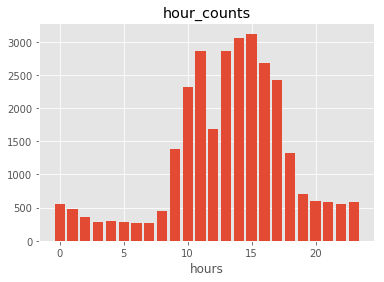

In [61]:
out = pd.cut(data['i_Time'], bins = range(0,25))
hour_counts = pd.value_counts(out,sort=False)
print hour_counts.index.values
#counts.plot('bar')
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(range(0,24),hour_counts)
ax.set_title('hour_counts')
ax.set_xlabel('hours')
#ax.xaxis.set_minor_locator(months)
#ax.autoscale_view()
#ax.set_xticklabels(hour_counts.index.values)
#fig.autofmt_xdate()
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/hour_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

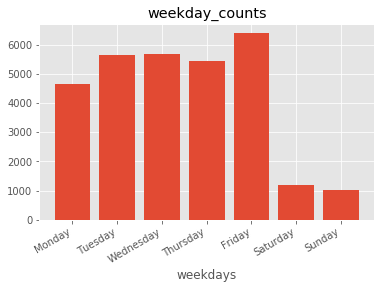

In [100]:
weekday_counts = data['weekday'].value_counts(sort=False)
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(weekday_counts.index,weekday_counts)
#ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
ax.set_xticklabels(["Monday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
fig.autofmt_xdate()
ax.set_title('weekday_counts')
ax.set_xlabel('weekdays')
#ax2 = fig.add_subplot(222)
#ax2.pie(weekday_counts)
#ax2.set_aspect('equal')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/weekday_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

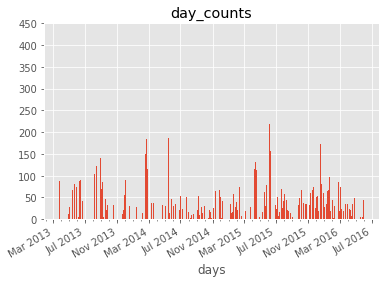

In [103]:
day_counts = data['n'].resample('D',how='count')
fig = plt.figure()
ax = fig.add_subplot(111)
months = mdates.MonthLocator()
#day_counts.plot('bar')
#ax.bar(range(day_counts.shape[0]),day_counts)
ax.bar(day_counts.index,day_counts)
ax.xaxis.set_minor_locator(months)
ax.set_ylim([0,450])
ax.set_xlabel('days')
#ax.autoscale_view()
fig.autofmt_xdate()
ax.set_title('day_counts')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/day_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

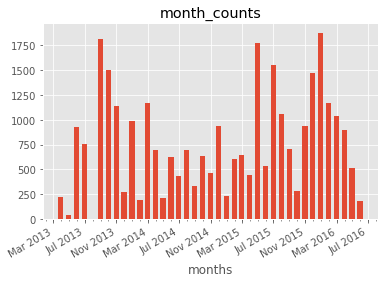

In [64]:
month_counts = data['n'].resample('M',how='count')
fig = plt.figure()
ax = fig.add_subplot(111)
months = mdates.MonthLocator()
ax.bar(month_counts.index,month_counts, width=20)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
fig.autofmt_xdate()
ax.set_xlabel('months')
ax.set_title('month_counts')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/month_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

2013-01-01     7661
2014-01-01     6639
2015-01-01    11890
2016-01-01     3802
Freq: AS-JAN, Name: n, dtype: int64


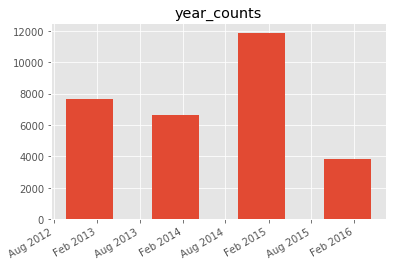

In [92]:
year_counts = data['n'].resample('AS',how='sum')
print year_counts
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(year_counts.index,year_counts,width=200)
#ax.xaxis.set_minor_locator(months)
#ax.autoscale_view()
fig.autofmt_xdate()
ax.set_title('year_counts')
ax.set_title('year_counts')
#hour_counts.plot('bar')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/year_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

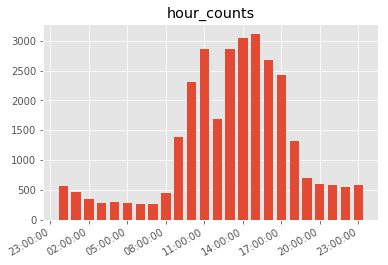

In [93]:
hour_counts = data2['n'].resample('h',how='count')
fig = plt.figure()
ax = fig.add_subplot(111)
#months = mdates.MonthLocator()
ax.bar(hour_counts.index,hour_counts,width=0.03)
#ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
fig.autofmt_xdate()
#ax.set_xlabel('months')
ax.set_title('hour_counts')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/hour_count.png', dpi=500, bbox_inches='tight', pad_inches=0)

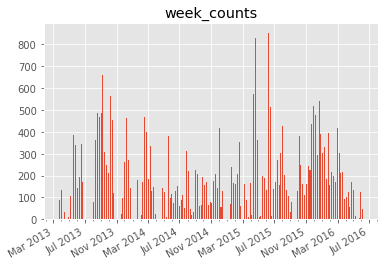

In [99]:
week_counts = data['n'].resample('W-MON',how='count')
fig = plt.figure()
ax = fig.add_subplot(111)
months = mdates.MonthLocator()
ax.bar(week_counts.index,week_counts,width=4)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
#ax.set_xticklabels(["Monday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
fig.autofmt_xdate()
ax.set_title('week_counts')
#ax.set_xlabel('weekdays')
#ax2 = fig.add_subplot(222)
#ax2.pie(weekday_counts)
#ax2.set_aspect('equal')
fig.savefig('/home/jorghyq/Dropbox/STM_statistics/week_count.png', dpi=500, bbox_inches='tight', pad_inches=0)